## importing required libraries 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")



#reading load data from loan.csv 
loan_df = pd.read_csv('loan.csv')

print(loan_df.head())
print(loan_df.shape)


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

## Data Inspection & Cleaning 

   ### Lets check the type of data & description of remaining columns  

In [3]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [4]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### It is observed that there are lot of columns which have only null values so drop them 

In [5]:
# dropping all the columns which has only null values  
loan_df.dropna(axis = 1, how = 'all',inplace=True)
print(loan_df.head())
print(loan_df.shape)

#We can observe that 54 columns which contain null values in all the rows


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code applicat

### In our analysis single value columns wont help to analysis whether member can be defaulter or not so removing single value columns 

In [6]:

loan_df.drop(["pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "application_type", "pub_rec_bankruptcies", "tax_liens", "delinq_amnt"], axis = 1, inplace = True)
print(loan_df.shape)


(39717, 48)


### Cloumns like Id ,Member_id , Url , Tital , Emp_title,Zip_code , Last_creeddit_pull_d,address state ,desc doesnt contribute to loan defaulting so dropping those columns 

In [7]:
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc"], axis = 1, inplace = True)

print(loan_df.shape)

(39717, 39)


### Find the number  of defaulters and fully paid members 

In [8]:
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

### In loan status we are more interested in charged off and fully paid values so dropping members with loan staus as current 


In [9]:
loan_df = loan_df[loan_df.loan_status != "Current"]


## Analysis 

##### lets plot loan_Status against amount for analysis 

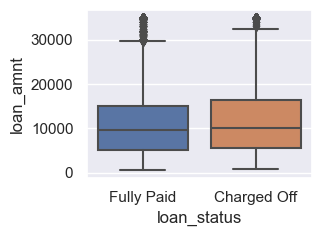

In [10]:
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_df)
plt.show()

###### with the above plot we can conclude that higher the amount chances of defaulting is more 

### Analysing homeownership data of defaulters 

In [11]:
loan_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

##### Home ownership data shows only 3 None values present so replacing the value with Other 

In [12]:
#replacing 'NONE' with 'OTHERS'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

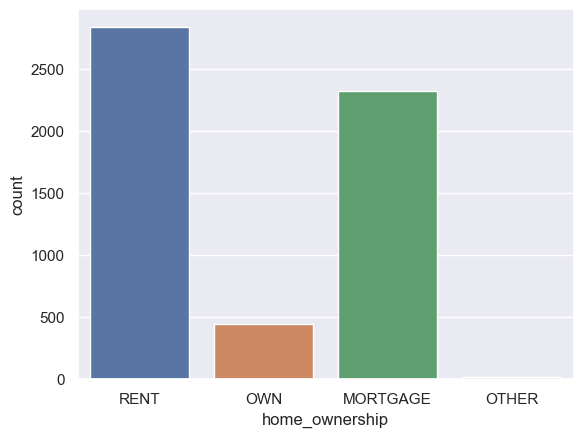

In [13]:

sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

###### From the above plot it shows the most of the defaulters are from Rent and people whose house is in Mortgage 

### Analysing Loan Status with Annual_inc

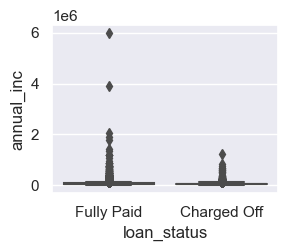

In [14]:
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = loan_df)
plt.show()

###### from the above plot we can say that higher the income lower the chances of getting charged off 

### Analysing Loan Purpose of defaulters 

<Axes: xlabel='count', ylabel='purpose'>

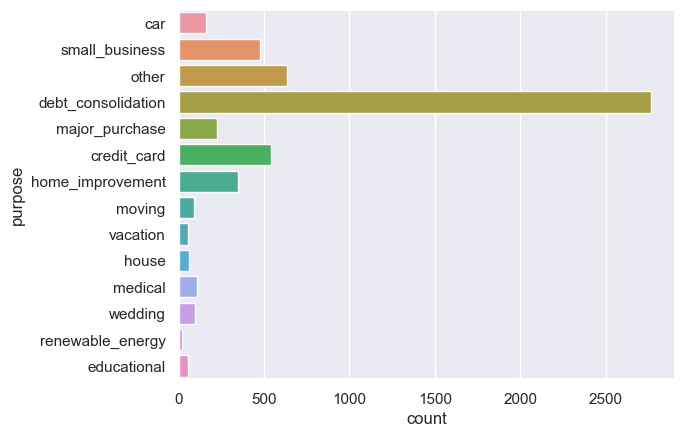

In [15]:
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

##### From the above plot we can tell  most of the defaulters have taken loan to clear the other debts 


### Analysis based on Verification satus of Defaulters 

<Axes: xlabel='verification_status', ylabel='count'>

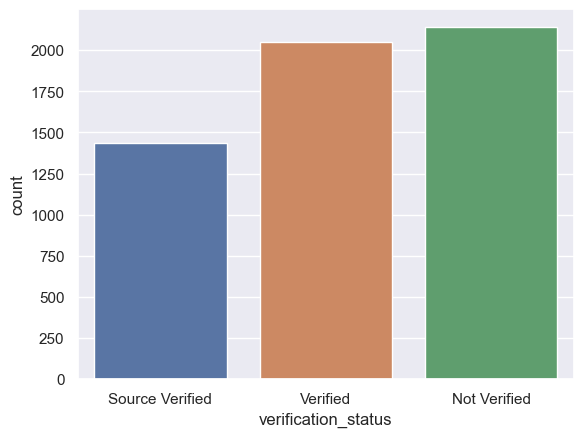

In [16]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

###### From the above plot we will come to know that most of the defaulters not Verified 

### Analysing the number of inquiries in past 6 months for defaulters 

<Axes: xlabel='inq_last_6mths', ylabel='count'>

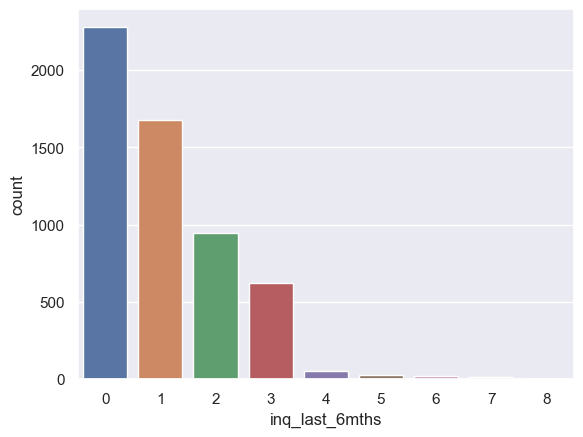

In [17]:
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])

##### Above plot shows when number of inquiries is more it helps in reducing defaulters  

### Analysis on Public derogatory records of Defaulters 

<Axes: xlabel='pub_rec', ylabel='count'>

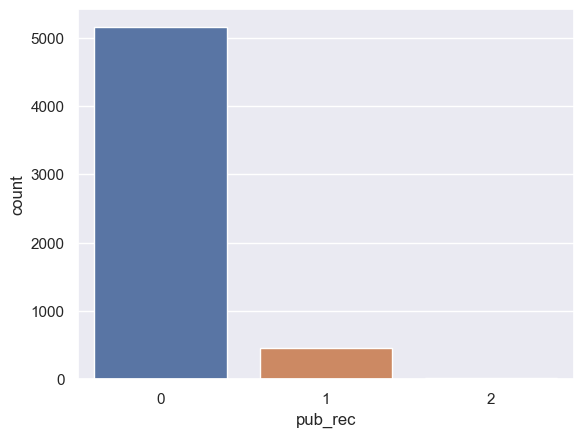

In [18]:
sns.countplot(x='pub_rec', data=loan_df[loan_df['loan_status']=='Charged Off'])

##### As expected people who have derogatory public record are more in defaulter list 

### Analysis of defaulters based on Employment Length 

<Axes: xlabel='emp_length', ylabel='count'>

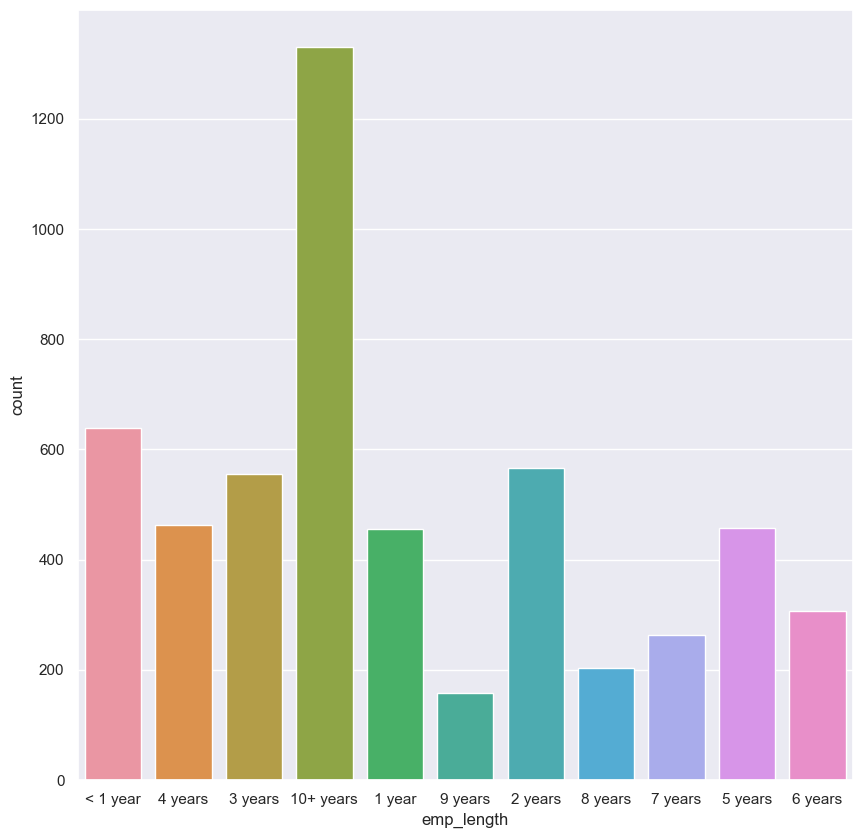

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x='emp_length', data=loan_df[loan_df.loan_status == 'Charged Off'])

### Analysis based on loan issued year 

In [20]:
#converting string Date time into Python Date time object
#creating year columns separately

loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['year']=loan_df['issue_d'].dt.year

<Axes: xlabel='year', ylabel='count'>

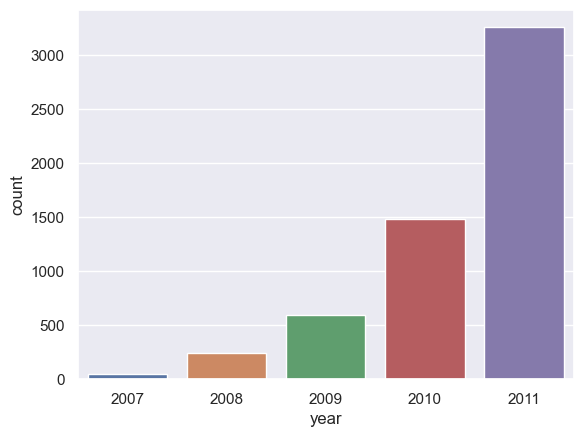

In [21]:
sns.countplot(x='year', data=loan_df[loan_df.loan_status == 'Charged Off'])

### Creating bins for interest rate of defaulters 

In [ ]:
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : x.split('%')[0]))

In [51]:

loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['int_rate'].info

<bound method Series.info of 0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64>

##### Ploting interest rate bins for defaulters to analyse 

<Axes: xlabel='int_rate_bin', ylabel='count'>

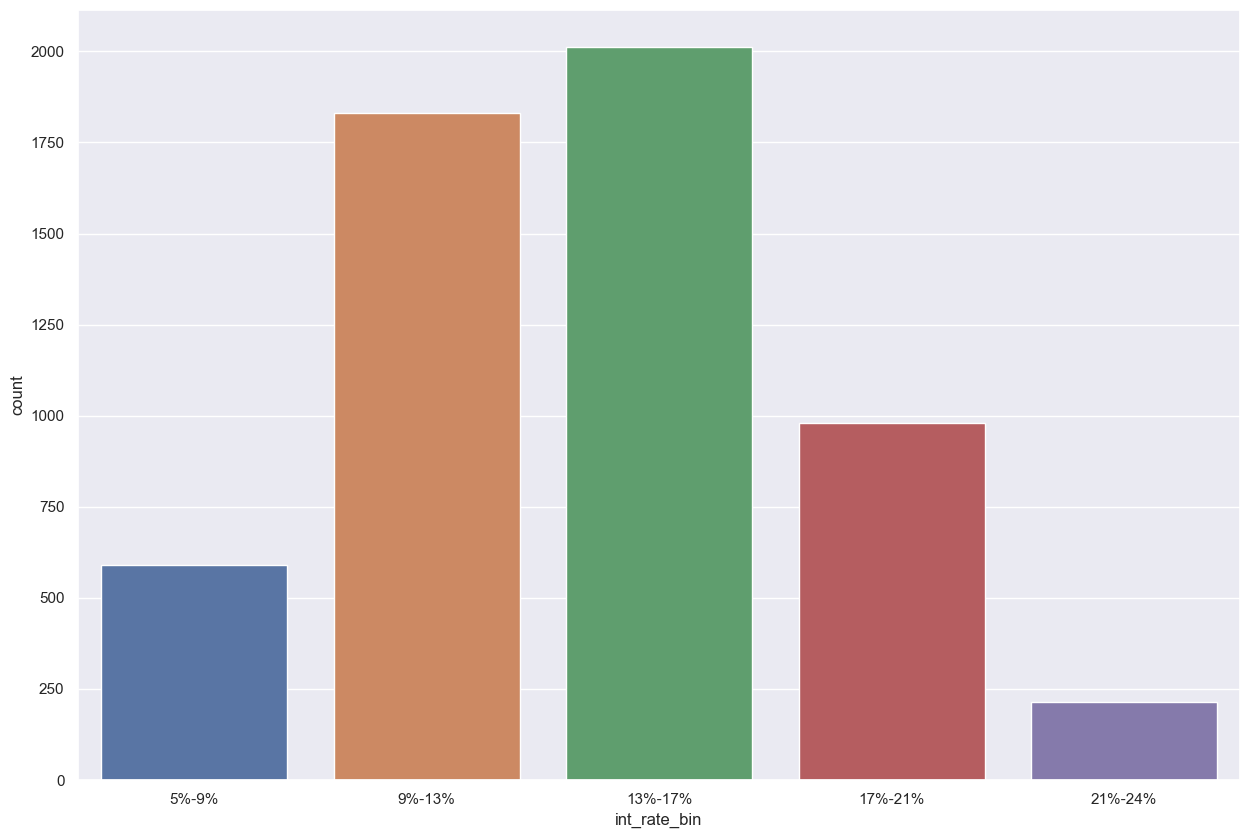

In [53]:

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='int_rate_bin', data=loan_df[loan_df.loan_status == 'Charged Off'])

##### above plot indicates people with intereset rate b/w 13-17% has more defaulters 